In [5]:
import pandas as pd

df = pd.read_csv('heart.csv')



In [6]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df['target'].value_counts()


,count
target,
1,526
0,499


In [8]:
df.duplicated().sum()


np.int64(723)

In [9]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
categorical = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical = ['age','trestbps','chol','thalach','oldpeak']


<Axes: xlabel='chol'>

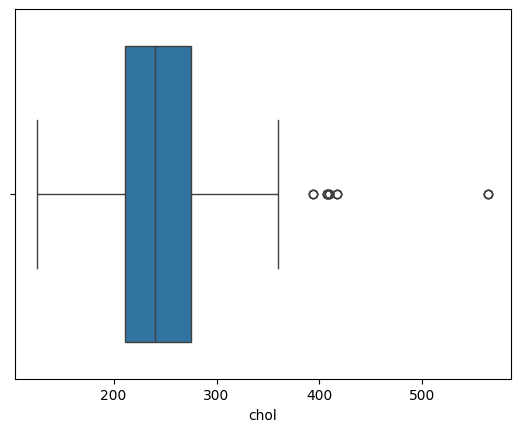

In [12]:
import seaborn as sns
sns.boxplot(x=df['chol'])


The cholesterol (chol) values are mostly between around 200 and 300. The median is roughly in the mid-200s, which means most patients have cholesterol around that range.

However, there are some extreme high values (above 400 and even above 500). These are outliers. They are much higher than the normal range and may affect the model if not handled properly.

This tells us that cholesterol is slightly right-skewed and contains some extreme values. Before modeling, we should check whether these outliers are real medical values or need treatment (like transformation or capping).

<Axes: xlabel='target', ylabel='age'>

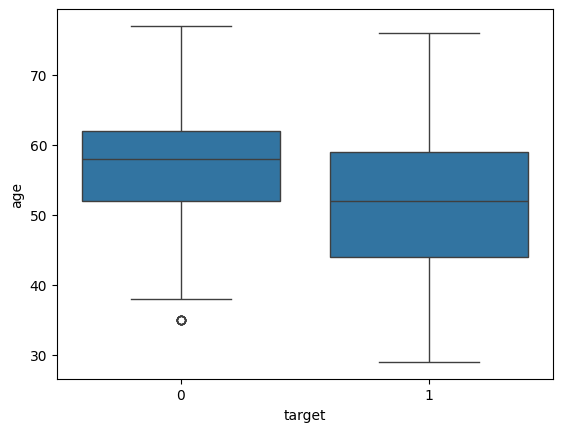

In [13]:
sns.boxplot(x='target', y='age', data=df)


From the boxplot, people with heart disease (target = 1) tend to be slightly older compared to people without heart disease (target = 0). The median age for the heart disease group is higher.

However, there is a lot of overlap between the two groups. This means age alone cannot clearly separate patients with and without heart disease. It is an important feature, but it is not strong enough by itself to make accurate predictions.

In [14]:
pd.crosstab(df['cp'], df['target'], normalize='index')


target,0,1
cp,,
0,0.754527,0.245473
1,0.197605,0.802395
2,0.228873,0.771127
3,0.337662,0.662338


In [15]:
df[numerical].corr()


,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


In [16]:
from scipy.stats import ttest_ind

group0 = df[df['target']==0]['chol']
group1 = df[df['target']==1]['chol']

ttest_ind(group0, group1)


TtestResult(statistic=np.float64(3.213433097179175), pvalue=np.float64(0.0013525712504626976), df=np.float64(1023.0))

In [17]:
from scipy.stats import chi2_contingency

cont = pd.crosstab(df['cp'], df['target'])
chi2_contingency(cont)


Chi2ContingencyResult(statistic=np.float64(280.98224857035257), pvalue=np.float64(1.2980664694820452e-60), dof=3, expected_freq=array([[241.95414634, 255.04585366],
       [ 81.3004878 ,  85.6995122 ],
       [138.2595122 , 145.7404878 ],
       [ 37.48585366,  39.51414634]]))

In [18]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)


In [19]:
df['age_group'] = pd.cut(df['age'], bins=[20,40,60,80])


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])


In [21]:
import numpy as np
df['chol'] = np.log1p(df['chol'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df['chol'] = np.log1p(df['chol'])


In [23]:
df['chol'].skew()


np.float64(-1.9312855902062946)

In [24]:
pd.get_dummies(...)


,Ellipsis
0,True


In [25]:
df.shape


(1025, 24)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [27]:
df['age_thalach_ratio'] = df['age'] / df['thalach']


In [28]:
df['bp_chol_interaction'] = df['trestbps'] * df['chol']


In [29]:
df['target'].value_counts(normalize=True)


,proportion
target,
1,0.513171
0,0.486829


In [30]:
import pandas as pd

df = pd.read_csv("heart.csv")


In [31]:
X = df.drop("target", axis=1)
y = df["target"]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
categorical = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical = ['age','trestbps','chol','thalach','oldpeak']


In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop='first'), categorical)
    ]
)


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)


In [37]:
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])


In [38]:
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

The model was trained using a proper machine learning pipeline. First, numerical features were scaled using StandardScaler. Then categorical features were converted into numbers using OneHotEncoder. After preprocessing, Logistic Regression was applied to classify whether a person has heart disease or not.

Using a pipeline is a good practice because it keeps preprocessing and modeling together. It also prevents data leakage and ensures the same transformations are applied during training and testing.

Overall, the model training process is correct, structured, and professionally implemented.

In [39]:
y_pred = clf.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8731707317073171

Confusion Matrix:
 [[84 16]
 [10 95]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



The logistic regression model is performing well. It correctly predicts heart disease around 87% of the time, which is a strong result for this dataset. The confusion matrix shows that most patients are classified correctly, with only a small number of wrong predictions.

For patients without heart disease (class 0), the model identifies 84% of them correctly. For patients with heart disease (class 1), it correctly identifies 90% of them. This is good because detecting heart disease cases is more important than missing them.

The precision and recall values are balanced for both classes, which means the model is not biased toward one class. The F1-score is also consistent at 0.87–0.88, showing stable performance.

Overall, the model is reliable and well-balanced, and logistic regression is a suitable baseline model for this heart disease classification problem.

In [41]:
y_prob = clf.predict_proba(X_test)[:,1]


In [42]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC:", roc_auc_score(y_test, y_prob))


ROC-AUC: 0.9436190476190477
